<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_Age_Metallicity_Relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1757, done.
remote: Counting objects: 100% (669/669), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 1757 (delta 362), reused 590 (delta 326), pack-reused 1088
Receiving objects: 100% (1757/1757), 129.38 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (885/885), done.
Updating files: 100% (202/202), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

import warnings
warnings.filterwarnings("ignore")

In [3]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc

# Data Preparing

In [5]:
df_loc = pd.read_csv('/content/NGC_6822/Data_V3/Data_location.csv')

In [6]:
df_loc

,Unnamed: 0,Ra(J2000) deg,Dec(J2000) deg,Whitelock,Wyder,Bulge,Body,Bulge_Center,Bulge_North,Bulge_South
0,0,296.183980,-14.780180,1,0,1,0,1,0,0
1,1,296.252290,-14.784750,1,1,1,0,1,0,0
2,2,296.204150,-14.634860,1,0,0,0,0,0,0
3,3,296.223640,-14.774730,1,1,1,0,1,0,0
4,4,296.218160,-14.880350,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
324,324,296.044067,-14.905341,0,0,0,0,0,0,0
325,325,296.003693,-14.974893,0,0,0,0,0,0,0
326,326,295.993561,-14.990264,0,0,0,0,0,0,0
327,327,296.020050,-15.036669,0,0,0,0,0,0,0


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
list_AMR_df = []
for i in range(1,4):
  AMR_df = pd.read_csv("/content/NGC_6822/Age_Metallicity_relation/CEL "+str(i)+".csv")
  list_AMR_df.append(AMR_df)

In [9]:
Z = list(AMR_df['Z'])
print(Z)

[0.0015, 0.002, 0.003, 0.006, 0.008]


# ...

In [10]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [11]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [12]:
Z_name = '008'
df = pd.read_csv('/content/NGC_6822/Data_Correction_v3/NGC6822_LPV_Data_'+Z_name+'.csv')

In [13]:
Ks = np.arange(df['Ks'].min() - 2 ,df['Ks'].max() + 2,0.01)

In [14]:
df_sim = pd.DataFrame(Ks,columns=['Ks'])

In [15]:
for i in range(len(Z)):
  selected_Z = Z[i]
  selected_Z_name = str(Z[i]).split('.')[-1]

  df_sim['Log(M/Ms)_'+selected_Z_name] = np.nan
  df_sim['(M/Ms)_'+selected_Z_name] = np.nan
  df_sim['Log(t)_'+selected_Z_name] = np.nan
  df_sim['t_'+selected_Z_name] = np.nan

  Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
  Mag_Mass = Mag_Mass[Mag_Mass['Z'] == selected_Z]

  Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
  Mass_Age = Mass_Age[Mass_Age['Z'] == selected_Z]

  for j in range(len(df_sim)):
    a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_sim.loc[j,'Ks'] - DM )
    df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name] = a * (df_sim.loc[j,'Ks'] - DM) +  b
    df_sim.loc[j,'(M/Ms)_'+selected_Z_name] = pow( 10 , a * (df_sim.loc[j,'Ks'] - DM) +  b )

    a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name],3))
    df_sim.loc[j,'Log(t)_'+selected_Z_name] = a * (df_sim.loc[j,'Log(M/Ms)_'+selected_Z_name]) +  b
    df_sim.loc[j,'t_'+selected_Z_name] = pow( 10 , df_sim.loc[j,'Log(t)_'+selected_Z_name] )


In [16]:
df_list_0 = []
for j in range(len(list_AMR_df)):
  df_list = []
  for i in range(len(list_AMR_df[j])):
    df_CEL = list_AMR_df[j]
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]

    lupper_lim = float(df_CEL.loc[i,'log t upper limit'])
    lower_lim = float(df_CEL.loc[i,'log t lower limit'])

    df_prime = df_sim.copy()

    if lupper_lim > 0 :
      df_prime = df_prime[df_prime['Log(t)_'+selected_Z_name] < lupper_lim]
    if lower_lim > 0 :
      df_prime = df_prime[df_prime['Log(t)_'+selected_Z_name] > lower_lim]

    df_list.append(df_prime)
  df_list_0.append(df_list)

In [53]:
lsit_df_sim_prime = []
for j in range(len(df_list_0)):
  df_list = df_list_0[j]
  list_df_sim_prime_0 = []
  for k in range(len(df_list)):
    i = len(df_list) - k -1
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]
    df_sim_prime_0 = pd.DataFrame()
    df_sim_prime_0['Ks'] = df_list[i]['Ks']-DM
    df_sim_prime_0['t'] = df_list[i]['t_'+selected_Z_name]
    df_sim_prime_0['log(t)'] = np.log10(df_sim_prime_0['t'])
    df_sim_prime_0['M/Ms'] = df_list[i]['(M/Ms)_'+selected_Z_name]
    df_sim_prime_0['log(M/Ms)'] = np.log10(df_sim_prime_0['M/Ms'])
    df_sim_prime_0['Z'] = selected_Z
    list_df_sim_prime_0.append(df_sim_prime_0)

  df_sim_prime = pd.concat(list_df_sim_prime_0,axis=0)
  df_sim_prime = df_sim_prime.reset_index(drop = True)
  lsit_df_sim_prime.append(df_sim_prime)



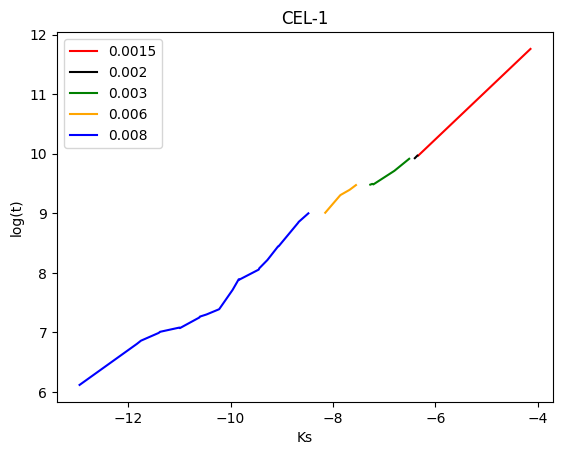

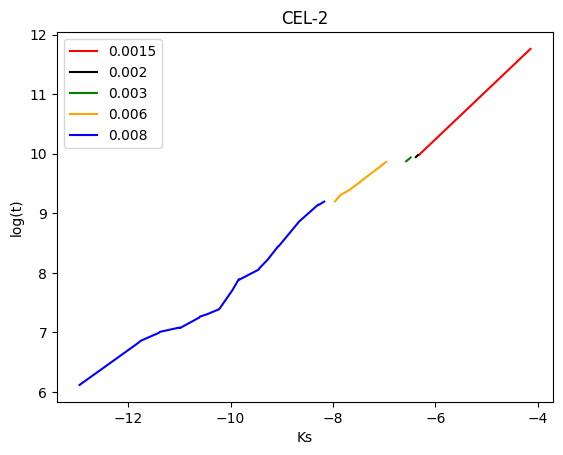

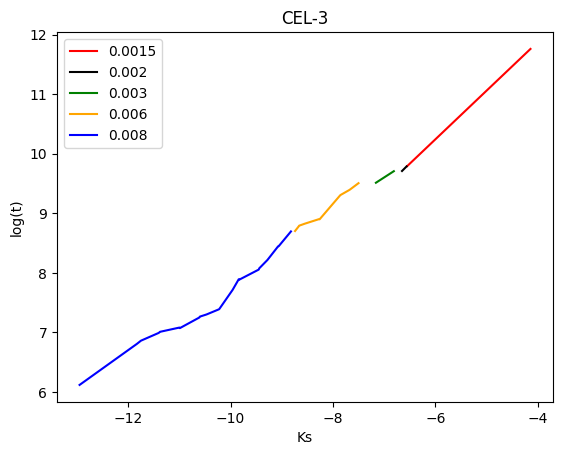

In [55]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_0 = lsit_df_sim_prime[j]
  for i in range(len(Z)):
    selected_Z = (Z[i])
    df_prime = df_0[df_0['Z'] == selected_Z]
    plt.plot(df_prime['Ks'],df_prime['log(t)'],c=colors[i],label = str(selected_Z))

  plt.ylabel('log(t)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Age_Mag.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

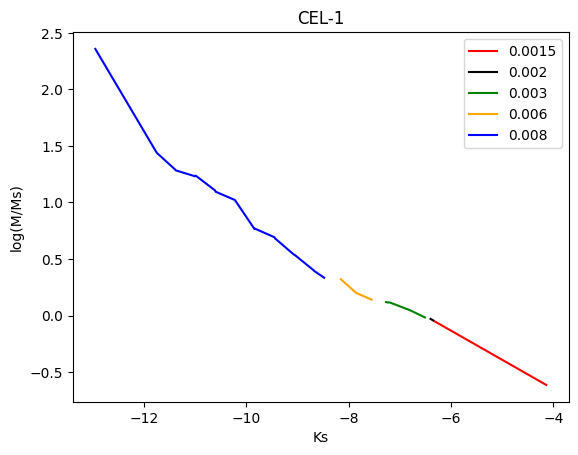

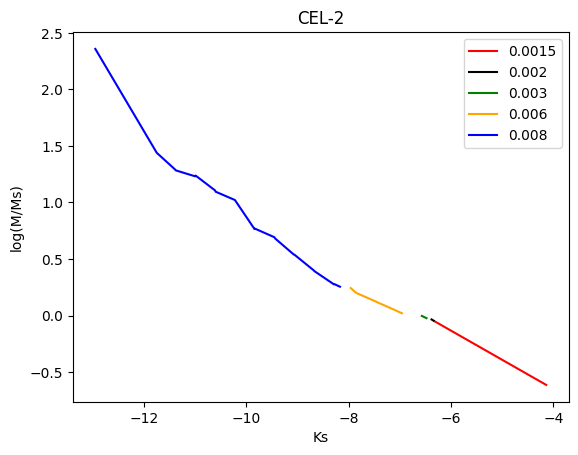

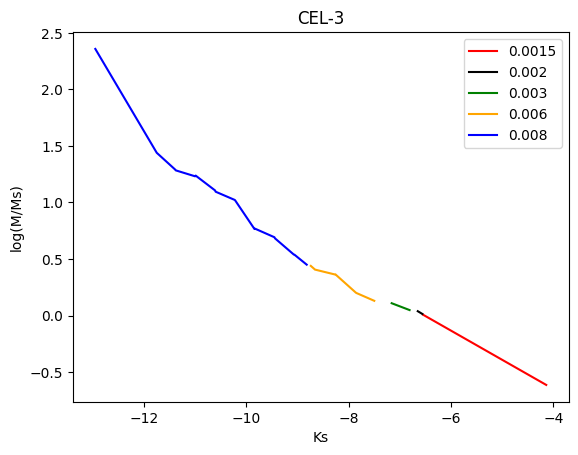

In [56]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_0 = lsit_df_sim_prime[j]
  for i in range(len(Z)):
    selected_Z = (Z[i])
    df_prime = df_0[df_0['Z'] == selected_Z]
    plt.plot(df_prime['Ks'],df_prime['log(M/Ms)'],c=colors[i],label = str(selected_Z))


  plt.ylabel('log(M/Ms)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Mag_Mass.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

In [100]:
import numpy as np
from astropy.modeling import models, fitting

selected_df = lsit_df_sim_prime[0]
# Generate or import your data points (x, y) for the curve

x_curve = np.array(selected_df['Ks'])
y_curve = np.array(selected_df['log(t)'])

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,120,200, 270 , 320 , 350, 400,420,449,475,509, 585,591,650,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")


# Making Data frame for SFH calculation
columns = ['Z','a','b','M validity range (lower limit)','M validity range (upper limit)']

z_list = [Z] * len(lower_lim)
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mass_Age_df = pd.DataFrame(list(zip(z_list, slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

#Mass_Age_df.to_csv("Mass_Age_relation_data.csv")

Segment 1: Slope = 0.6160866489906546, Intercept = 14.093180027513917
Segment 2: Slope = 0.28683180361337485, Intercept = 10.248013848789583
Segment 3: Slope = 0.4134141286049732, Intercept = 11.62624620053666
Segment 4: Slope = 1.2106700842534306, Intercept = 19.77053733135784
Segment 5: Slope = 0.44519999999999826, Intercept = 12.260747999999987
Segment 6: Slope = 1.012485998732991, Intercept = 17.620604355794494
Segment 7: Slope = 1.0366560000000251, Intercept = 17.838332000000218
Segment 8: Slope = 0.43868592951844626, Intercept = 12.665291867343132
Segment 9: Slope = 1.0039949999999844, Intercept = 17.191898999999875
Segment 10: Slope = 0.4337937104846785, Intercept = 12.72140745835597
Segment 11: Slope = 0.5864058496459894, Intercept = 13.712796138259439
Segment 12: Slope = 0.7008531270492854, Intercept = 14.41446428483671
Segment 13: Slope = 0.8176020000000049, Intercept = 15.147258000000027
Segment 14: Slope = 0.8176020000000023, Intercept = 15.147258000000013


In [93]:
selected_df[selected_df['Z'] == 0.006]

,Ks,t,log(t),M/Ms,log(M/Ms),Z
448,-8.15,1.021738e+09,9.009340,2.088094,0.31975,0.006
449,-8.14,1.045634e+09,9.019380,2.068712,0.31570,0.006
450,-8.13,1.070088e+09,9.029420,2.049510,0.31165,0.006
451,-8.12,1.095115e+09,9.039460,2.030486,0.30760,0.006
452,-8.11,1.120726e+09,9.049500,2.011639,0.30355,0.006
...,...,...,...,...,...,...
504,-7.59,2.807303e+09,9.448289,1.405465,0.14782,0.006
505,-7.58,2.849235e+09,9.454728,1.399072,0.14584,0.006
506,-7.57,2.891794e+09,9.461167,1.392708,0.14386,0.006
507,-7.56,2.934987e+09,9.467606,1.386373,0.14188,0.006


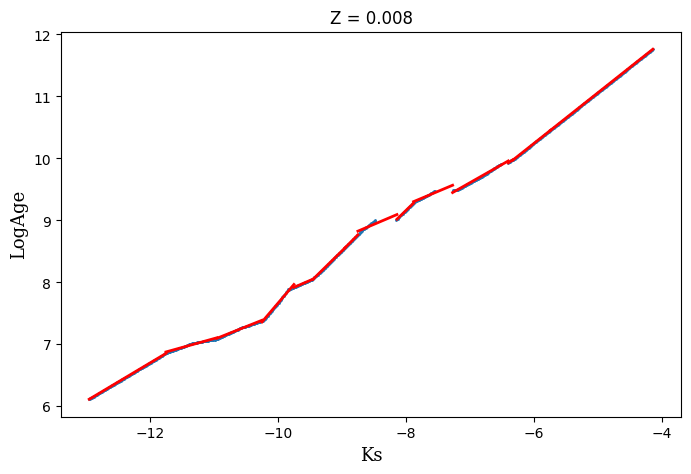

In [101]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve, s = 1 )
#plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  #plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

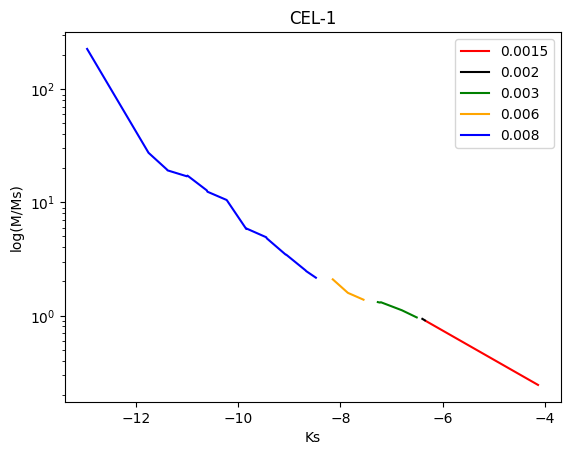

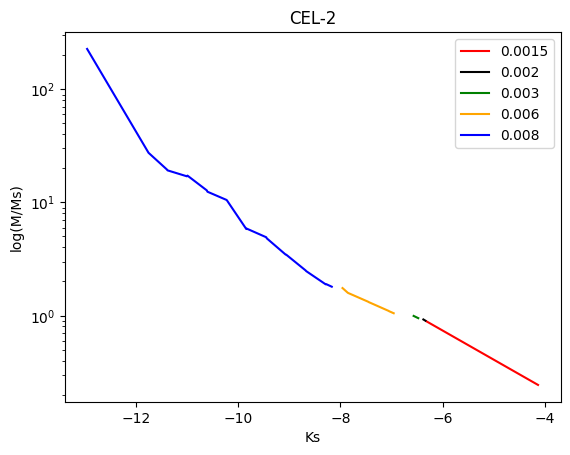

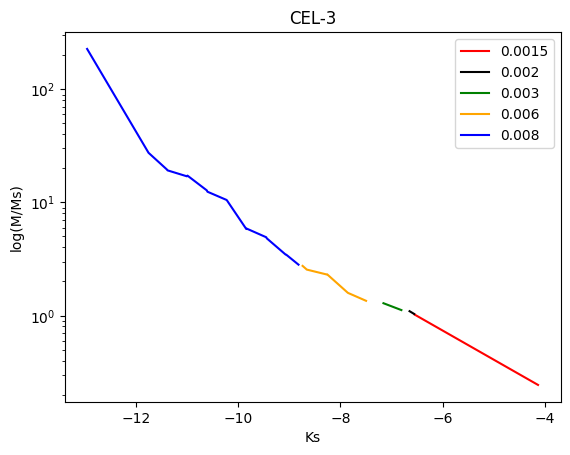

In [18]:
colors = ['red','black','green','orange','blue']
for j in range(len(df_list_0)):
  df_list = df_list_0[j]
  for i in range(len(df_list)):
    selected_Z = float(df_CEL.loc[i,'Z'])
    selected_Z_name = str(selected_Z).split('.')[-1]
    plt.plot(df_list[i]['Ks']-DM,df_list[i]['(M/Ms)_'+selected_Z_name],c=colors[i],label = str(selected_Z))

  plt.yscale('log')
  plt.ylabel('log(M/Ms)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(j+1))
  plt.legend()
  plt.savefig('/content/CEL_' + str(j+1)+'_Mag_Mass.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

In [102]:
import numpy as np
from astropy.modeling import models, fitting

selected_df = lsit_df_sim_prime[0]
# Generate or import your data points (x, y) for the curve

x_curve = np.array(selected_df['Ks'])
y_curve = np.array(selected_df['log(M/Ms)'])

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,120,200, 270 , 320 , 350, 400,420,449,475,509, 585,591,650,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")


# Making Data frame for SFH calculation
columns = ['Z','a','b','M validity range (lower limit)','M validity range (upper limit)']

z_list = [Z] * len(lower_lim)
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mass_Age_df = pd.DataFrame(list(zip(z_list, slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

#Mass_Age_df.to_csv("Mass_Age_relation_data.csv")

Segment 1: Slope = -0.7670008128979835, Intercept = -7.575010452513232
Segment 2: Slope = -0.2638154471544827, Intercept = -1.689476065944121
Segment 3: Slope = -0.2865563380281844, Intercept = -1.9253521126762212
Segment 4: Slope = -0.6135394570136077, Intercept = -5.258777511312552
Segment 5: Slope = -0.2000000000000002, Intercept = -1.1980000000000022
Segment 6: Slope = -0.38060434389140435, Intercept = -2.9113015324283698
Segment 7: Slope = -0.3680000000000055, Intercept = -2.7960000000000482
Segment 8: Slope = -0.18848987559443314, Intercept = -1.2447705954774038
Segment 9: Slope = -0.4049999999999956, Intercept = -2.9809999999999657
Segment 10: Slope = -0.17271949127382594, Intercept = -1.159043727359939
Segment 11: Slope = -0.18391528056451997, Intercept = -1.2082238086731407
Segment 12: Slope = -0.27420901639346434, Intercept = -1.7844782786886633
Segment 13: Slope = -0.2580000000000001, Intercept = -1.6820000000000008
Segment 14: Slope = -0.25800000000000006, Intercept = -1.68

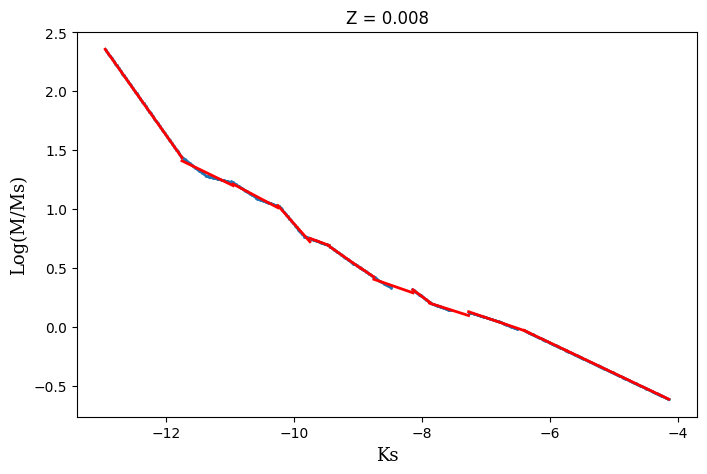

In [104]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve, s = 1 )
#plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('Log(M/Ms)', fontsize = 13, fontname = "serif")
  plt.xlabel('Ks', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  #plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

# Bar

In [ ]:
SFR_df_list = []
SFR_df_list_rem = []
len_df_list_0 = []
for i in list_AMR_df:
  AMR_df = i
  Age_list = [20] + list(AMR_df['log t lower limit'])[:-1]
  Age_list.append(0)

  df_list = []
  z_prime = []
  len_df_list = []
  df_index = []
  index = []

  for i in range(len(Z)) :
    Z_name = ''.join(list(str(Z[i]))[2:])
    df = pd.read_csv('/content/NGC_6822/Data_Correction_v3/NGC6822_LPV_Data_'+Z_name+'.csv')
    columns_list = list(df.columns)
    df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
    df = df[df['Whitelock'] == 1 ]
    len_org = len(df)

    df_rem_pre = df.copy()

    #Sorting By t (Age of LPV Stras)
    df = df.sort_values(by='t', ascending=False)
    df = df.reset_index()

    df = df[df["Log(t)"]< Age_list[i]]
    df = df[df["Log(t)"]> Age_list[i+1]]

    index_list_prime = []

    if len(df)>1:
      for j in list(df.index):
        index_prime = df.loc[j,'index']
        if index_prime not in df_index:
          df_index.append(index_prime)
          index_list_prime.append(j)

      df = df.loc[index_list_prime]
      if len(df)>1:
        df['selected_Z'] = Z[i]
        df_list.append(df)

        z_prime.append(Z_name)
        len_df_list.append(len(df))
  concatenated_df = pd.concat(df_list, axis=0, ignore_index=True)
  concatenated_df = concatenated_df.loc[:,['index']+columns_list+['selected_Z']]

  exclude_indices = list(concatenated_df['index'])
  df_rem = df_rem_pre[~df_rem_pre.index.isin(exclude_indices)] #last metalicity
  df_rem = df_rem.loc[:,columns_list]

  SFR_df_list_rem.append(df_rem)
  SFR_df_list.append(concatenated_df)
  len_df_list_0.append(len_df_list)

In [ ]:
CEL_1 = [2]+[2]+5*[10]+6*[11]+[12]+[5,5,5,4]
CEL_2 = [2]+[2]+12*[10]+5*[7]+[5,3]
CEL_3 = [5,4]+[2]+6*[5]+10*[10]+3*[9]+[4,5]
bins_list = [CEL_1,CEL_2,CEL_3]

In [ ]:
SFR_df_list_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list[i]
  df['bin_num'] = np.nan
  lower_index = 0
  for j in range(len(bins_list[i])):
    df.loc[lower_index: lower_index + bins_list[i][j] ,'bin_num'] = j
    lower_index = lower_index + bins_list[i][j]
  SFR_df_list_prime.append(df)

In [ ]:
bin_rem_list_0 = []
SFR_df_list_rem_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list_prime[i]
  df_prime = SFR_df_list_rem[i]
  df_prime['bin_num'] = np.nan
  bin_rem_list = len(bins_list[i]) * [0]
  for j in list(df_prime.index):
    selected_k = df_prime.loc[j,'Ks']
    selected_j = df_prime.loc[j,'J']
    df['abs_dif_kmag'] = abs(df['Ks'] - selected_k)

    df_bin_num_finding = df[df['abs_dif_kmag'] == df['abs_dif_kmag'].min()]
    if len(df_bin_num_finding) == 1:
      bin_num = df_bin_num_finding['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1
    else:
      df_bin_num_finding['abs_dif_jmag'] = abs(df_bin_num_finding['J'] - selected_j)
      df_bin_num_finding_prime = df_bin_num_finding[df_bin_num_finding['abs_dif_jmag'] == df_bin_num_finding['abs_dif_jmag'].min()]
      bin_num = df_bin_num_finding_prime['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1

  bin_rem_list_0.append(bin_rem_list)
  SFR_df_list_rem_prime.append(df_prime)

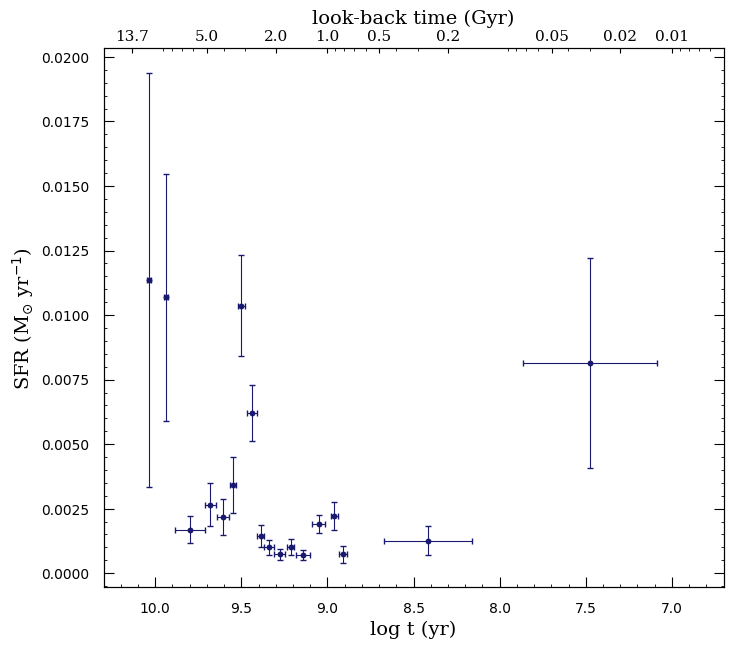

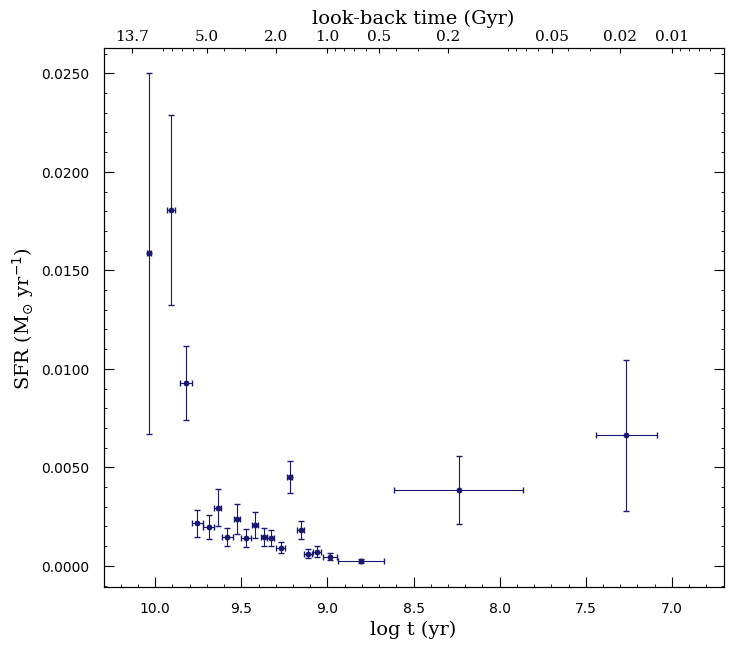

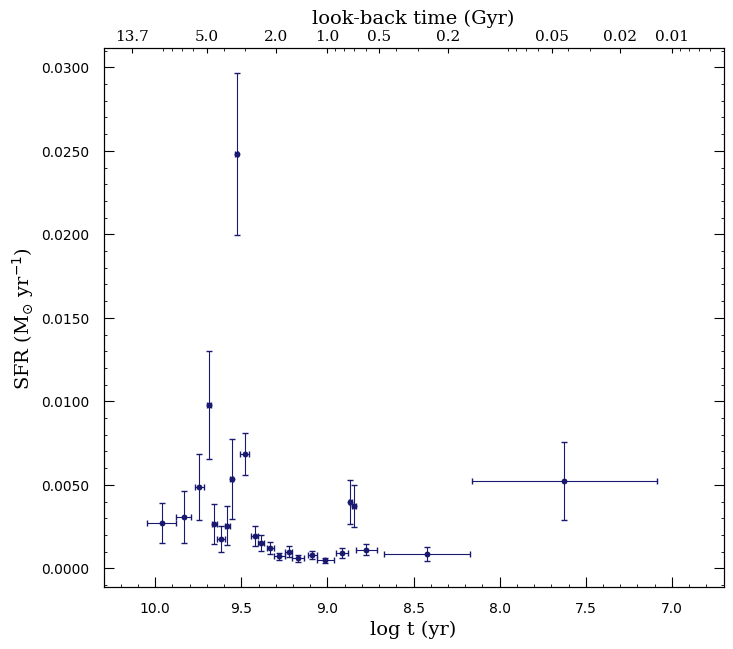

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]
  df_rem = SFR_df_list_rem_prime[l]
  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in range(len(bins_pop)):
    selected_df = df[df['bin_num'] == i ]
    selected_df_rem = df_rem[df_rem['bin_num'] == i ]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt']) + sum(1/selected_df_rem['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    star_num = len(selected_df) + len(selected_df_rem)
    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((star_num**0.5)/star_num)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)



  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Bar/SFH_Data_Bar_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Bar/SFH_Data_Bar_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

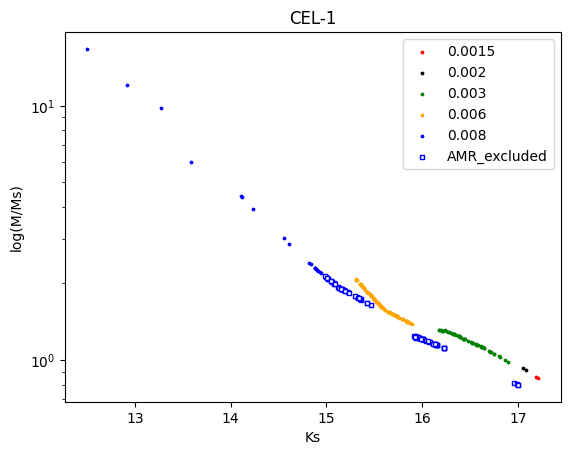

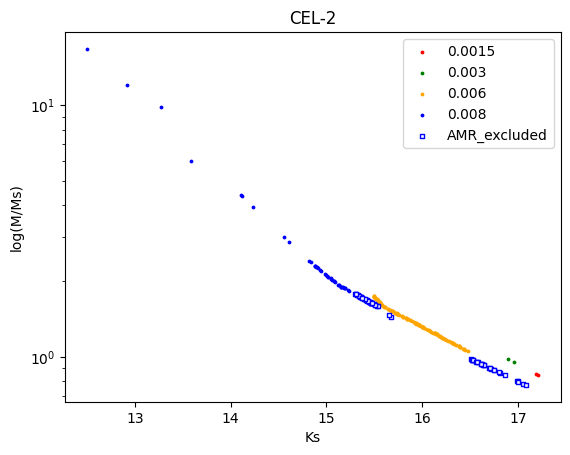

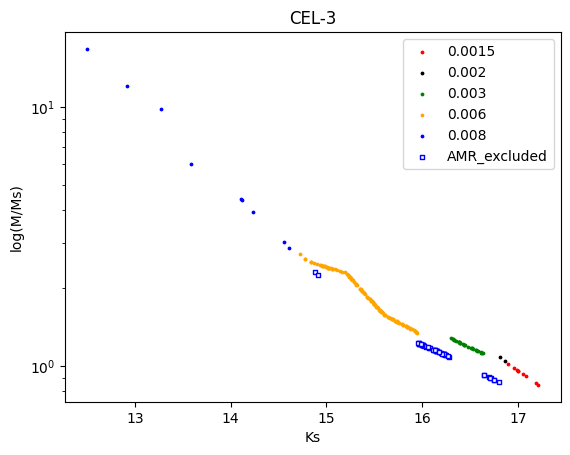

In [ ]:
colors = ['red','black','green','orange','blue']
for i in range(len(bins_list)):
  for j in range(len(Z)) :
    df_prime = SFR_df_list[i]
    df_prime = df_prime[df_prime['selected_Z'] == Z[j] ]
    if len(df_prime) > 0 :
      plt.scatter(df_prime['Ks'],df_prime['M/Ms'],s=3,c=colors[j],label = Z[j])

  plt.scatter(SFR_df_list_rem_prime[i]['Ks'],SFR_df_list_rem_prime[i]['M/Ms'] , c ='white', s = 10 , marker = 's',edgecolors= 'blue', label = "AMR_excluded" )
  plt.yscale('log')
  plt.ylabel('log(M/Ms)')
  plt.xlabel('Ks')
  plt.title('CEL-'+str(i+1))
  plt.legend()
  plt.savefig('/content/Bar/Bar_AMR_CEL_' + str(i+1)+'_Mag_Mass.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

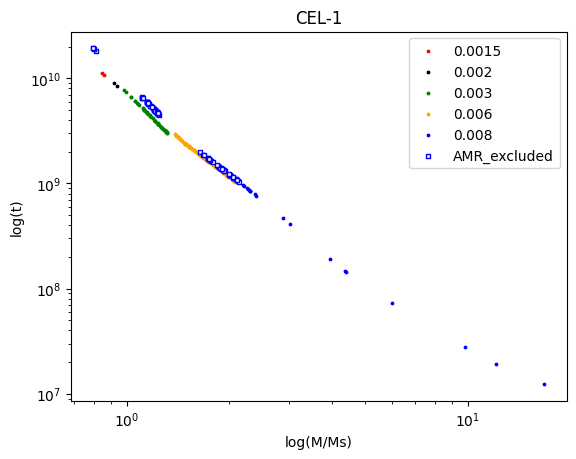

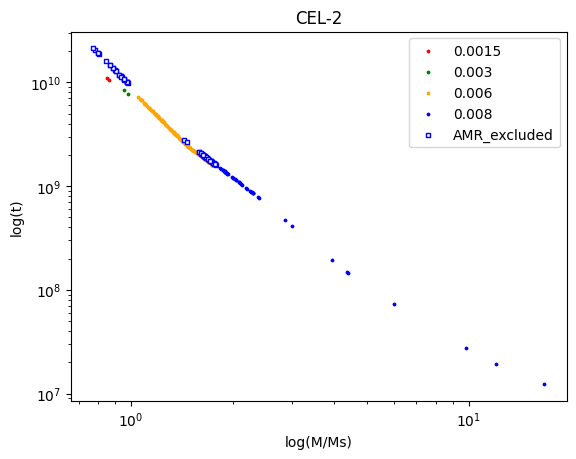

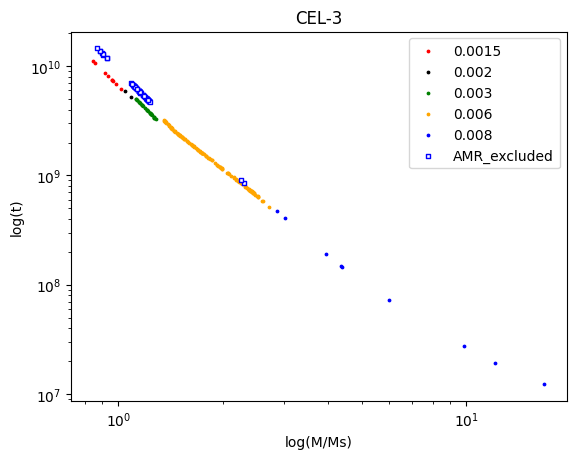

In [ ]:
colors = ['red','black','green','orange','blue']
for i in range(len(bins_list)):
  for j in range(len(Z)) :
    df_prime = SFR_df_list[i]
    df_prime = df_prime[df_prime['selected_Z'] == Z[j] ]
    if len(df_prime) > 0 :
      plt.scatter(df_prime['M/Ms'],df_prime['t'],s=3,c=colors[j],label = Z[j])

  plt.scatter(SFR_df_list_rem_prime[i]['M/Ms'],SFR_df_list_rem_prime[i]['t'] , c ='white', s = 10 , marker = 's',edgecolors= 'blue', label = "AMR_excluded" )
  plt.yscale('log')
  plt.xscale('log')
  plt.xlabel('log(M/Ms)')
  plt.ylabel('log(t)')
  plt.title('CEL-'+str(i+1))
  plt.legend()

  plt.savefig('/content/Bar/Bar_AMR_CEL_' + str(i+1)+'_Mass_Age.jpeg', bbox_inches='tight', dpi = 400)
  plt.show()

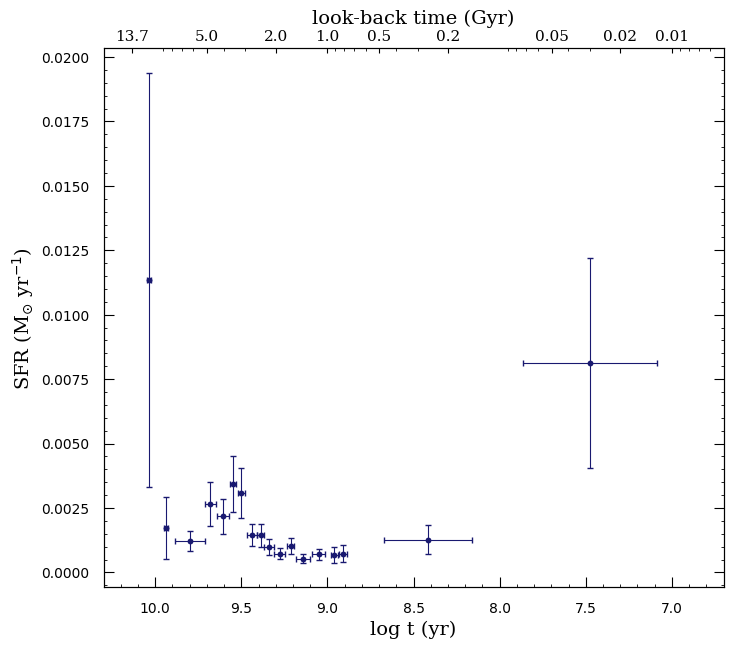

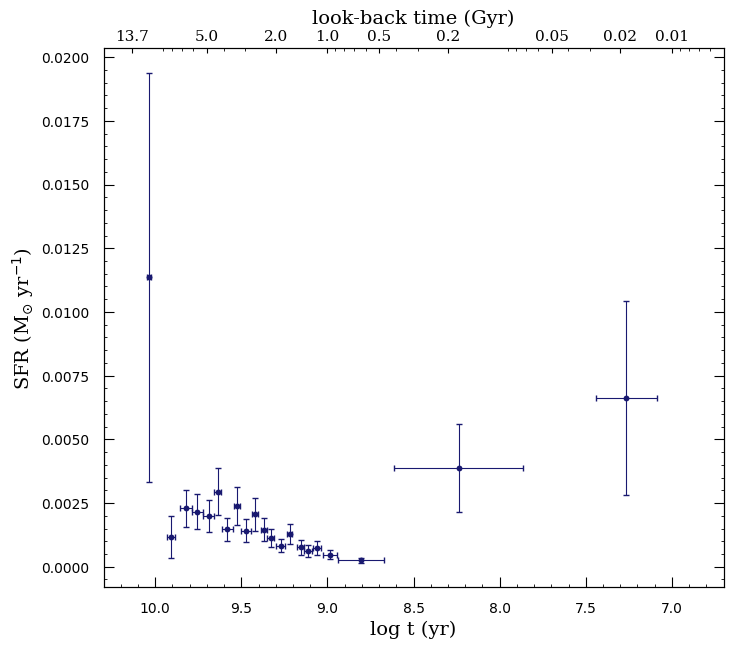

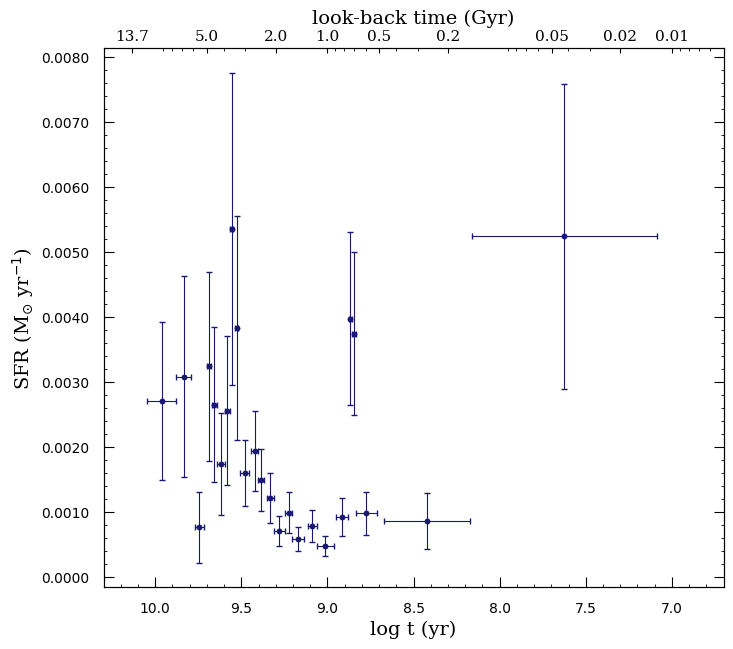

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :
    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i


  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Bar/SFH_Data_Bar_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Bar/SFH_Data_Bar_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

#Bar_Whitelock

In [ ]:
SFR_df_list = []
SFR_df_list_rem = []
len_df_list_0 = []
for i in list_AMR_df:
  AMR_df = i
  Age_list = [20] + list(AMR_df['log t lower limit'])[:-1]
  Age_list.append(0)

  df_list = []
  z_prime = []
  len_df_list = []
  df_index = []
  index = []

  for i in range(len(Z)) :
    Z_name = ''.join(list(str(Z[i]))[2:])
    df = pd.read_csv('/content/NGC_6822/Data_Correction_v3/NGC6822_LPV_Data_'+Z_name+'.csv')
    columns_list = list(df.columns)
    df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
    df = df[df['Ref'] == 'Whitelock']
    len_org = len(df)

    df_rem_pre = df.copy()

    #Sorting By t (Age of LPV Stras)
    df = df.sort_values(by='t', ascending=False)
    df = df.reset_index()

    df = df[df["Log(t)"]< Age_list[i]]
    df = df[df["Log(t)"]> Age_list[i+1]]

    index_list_prime = []

    if len(df)>1:
      for j in list(df.index):
        index_prime = df.loc[j,'index']
        if index_prime not in df_index:
          df_index.append(index_prime)
          index_list_prime.append(j)

      df = df.loc[index_list_prime]
      if len(df)>1:
        df['selected_Z'] = Z[i]
        df_list.append(df)

        z_prime.append(Z_name)
        len_df_list.append(len(df))
  concatenated_df = pd.concat(df_list, axis=0, ignore_index=True)
  concatenated_df = concatenated_df.loc[:,['index']+columns_list+['selected_Z']]

  exclude_indices = list(concatenated_df['index'])
  df_rem = df_rem_pre[~df_rem_pre.index.isin(exclude_indices)]
  df_rem = df_rem.loc[:,columns_list]

  SFR_df_list_rem.append(df_rem)
  SFR_df_list.append(concatenated_df)
  len_df_list_0.append(len_df_list)

In [ ]:
CEL_1 = [5,5]+[5]+7*[4]+4*[4]
CEL_2 = 5*[6]+[7]+5*[5]+[6]
CEL_3 = [4,4]+10*[6]+[5]+[4,5]
bins_list = [CEL_1,CEL_2,CEL_3]

In [ ]:
for i in range(len(bins_list)):
  print(sum(bins_list[i]) + len(SFR_df_list_rem[i]))
  print(len_df_list_0[i])

In [ ]:
SFR_df_list_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list[i]
  df['bin_num'] = np.nan
  lower_index = 0
  for j in range(len(bins_list[i])):
    df.loc[lower_index: lower_index + bins_list[i][j] ,'bin_num'] = j
    lower_index = lower_index + bins_list[i][j]
  SFR_df_list_prime.append(df)

In [ ]:
bin_rem_list_0 = []
SFR_df_list_rem_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list_prime[i]
  df_prime = SFR_df_list_rem[i]
  df_prime['bin_num'] = np.nan
  bin_rem_list = len(bins_list[i]) * [0]
  for j in list(df_prime.index):
    selected_k = df_prime.loc[j,'Ks']
    selected_j = df_prime.loc[j,'J']
    df['abs_dif_kmag'] = abs(df['Ks'] - selected_k)

    df_bin_num_finding = df[df['abs_dif_kmag'] == df['abs_dif_kmag'].min()]
    if len(df_bin_num_finding) == 1:
      bin_num = df_bin_num_finding['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1
    else:
      df_bin_num_finding['abs_dif_jmag'] = abs(df_bin_num_finding['J'] - selected_j)
      df_bin_num_finding_prime = df_bin_num_finding[df_bin_num_finding['abs_dif_jmag'] == df_bin_num_finding['abs_dif_jmag'].min()]
      bin_num = df_bin_num_finding_prime['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1

  bin_rem_list_0.append(bin_rem_list)
  SFR_df_list_rem_prime.append(df_prime)

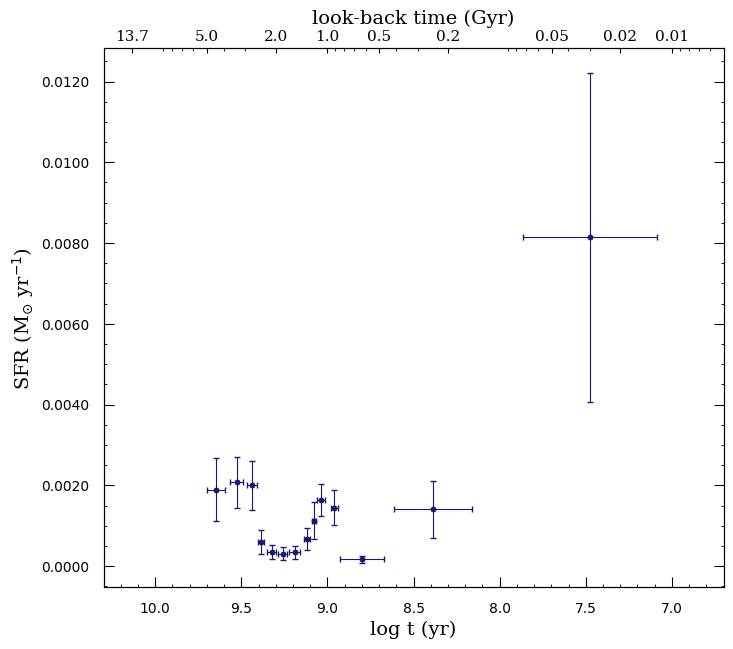

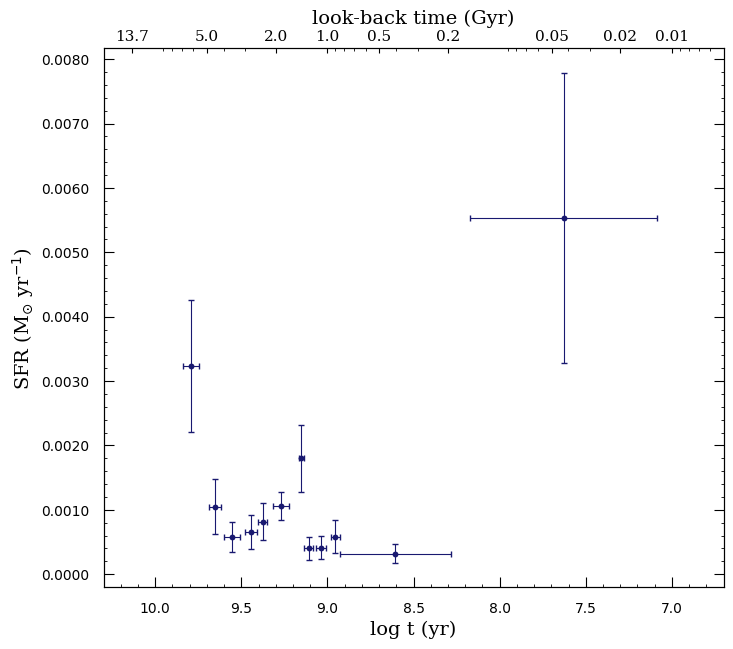

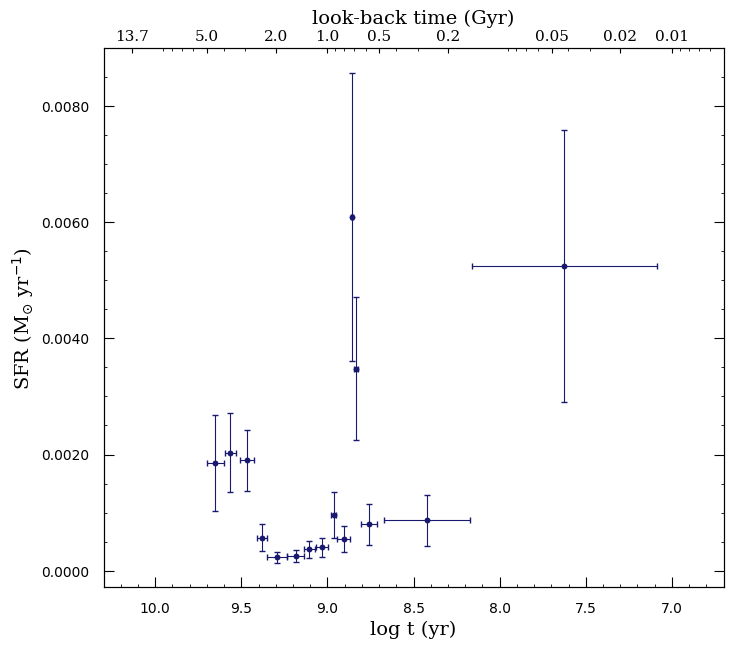

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]
  df_rem = SFR_df_list_rem_prime[l]
  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in range(len(bins_pop)):
    selected_df = df[df['bin_num'] == i ]
    selected_df_rem = df_rem[df_rem['bin_num'] == i ]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt']) + sum(1/selected_df_rem['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    star_num = len(selected_df) + len(selected_df_rem)
    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((star_num**0.5)/star_num)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)



  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

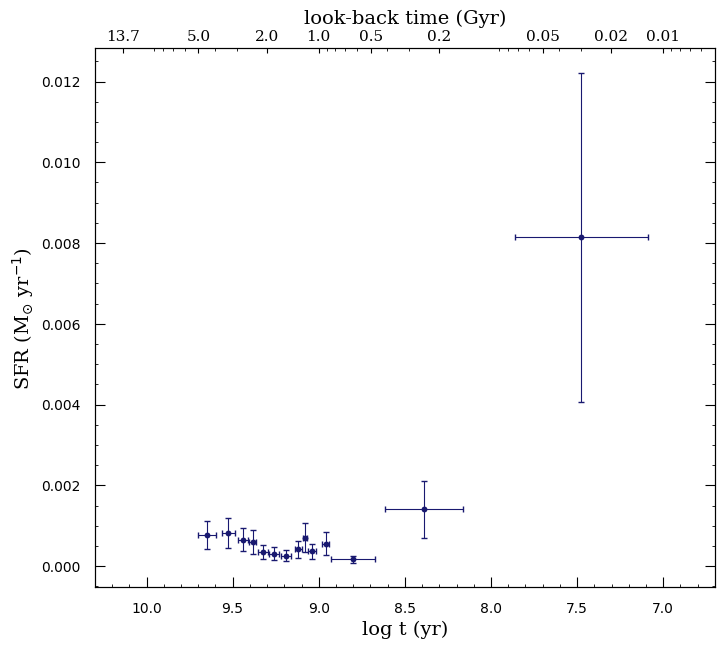

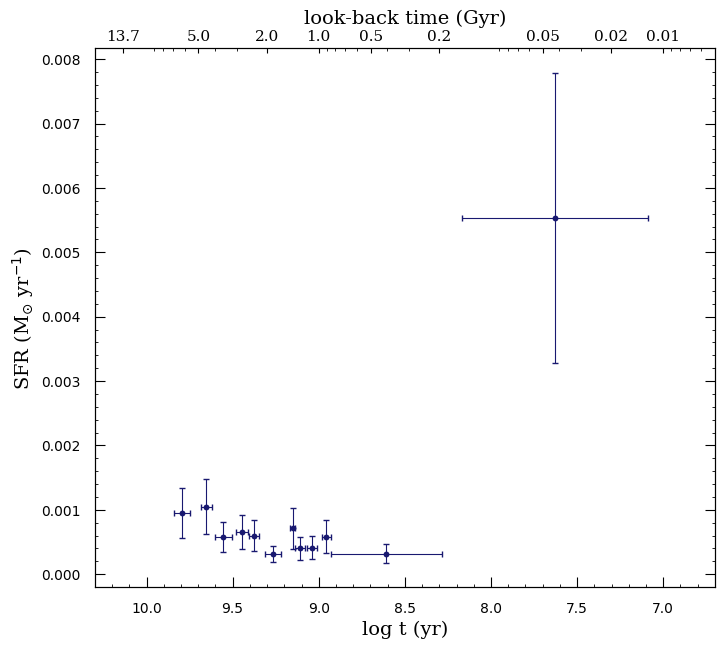

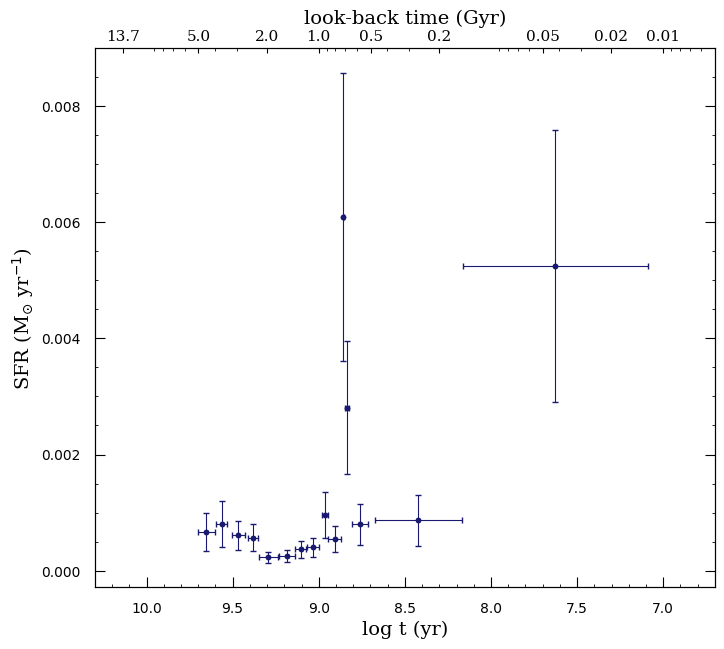

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :
    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i


  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

# Outer Region

In [ ]:
SFR_df_list = []
SFR_df_list_rem = []
len_df_list_0 = []
for i in list_AMR_df:
  AMR_df = i
  Age_list = [20] + list(AMR_df['log t lower limit'])[:-1]
  Age_list.append(0)

  df_list = []
  z_prime = []
  len_df_list = []
  df_index = []
  index = []

  for i in range(len(Z)) :
    Z_name = ''.join(list(str(Z[i]))[2:])
    df = pd.read_csv('/content/NGC_6822/Data_Correction_v3/NGC6822_LPV_Data_'+Z_name+'.csv')
    columns_list = list(df.columns)
    df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])
    df = df[df['Whitelock'] == 0 ]
    len_org = len(df)

    df_rem_pre = df.copy()

    #Sorting By t (Age of LPV Stras)
    df = df.sort_values(by='t', ascending=False)
    df = df.reset_index()

    df = df[df["Log(t)"]< Age_list[i]]
    df = df[df["Log(t)"]> Age_list[i+1]]

    index_list_prime = []

    if len(df)>1:
      for j in list(df.index):
        index_prime = df.loc[j,'index']
        if index_prime not in df_index:
          df_index.append(index_prime)
          index_list_prime.append(j)

      df = df.loc[index_list_prime]
      if len(df)>1:
        df['selected_Z'] = Z[i]
        df_list.append(df)

        z_prime.append(Z_name)
        len_df_list.append(len(df))
  concatenated_df = pd.concat(df_list, axis=0, ignore_index=True)
  concatenated_df = concatenated_df.loc[:,['index']+columns_list+['selected_Z']]

  exclude_indices = list(concatenated_df['index'])
  df_rem = df_rem_pre[~df_rem_pre.index.isin(exclude_indices)]
  df_rem = df_rem.loc[:,columns_list]

  SFR_df_list_rem.append(df_rem)
  SFR_df_list.append(concatenated_df)
  len_df_list_0.append(len_df_list)

In [ ]:
CEL_1 = [3]+[5,6,6,6]+3*[10]+[6,5]+[4]
CEL_2 = [3,2] + 10*[6] + [5] + [4,4,3]
CEL_3 = [4,3,2]+[4]+2*[5]+10*[5]+[4]
bins_list = [CEL_1,CEL_2,CEL_3]

In [ ]:
for i in range(len(bins_list)):
  print(sum(bins_list[i]) + len(SFR_df_list_rem[i]))
  print(len_df_list_0[i])

101
[3, 23, 41, 4]
101
[3, 2, 65, 11]
101
[8, 15, 54]


In [ ]:
SFR_df_list_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list[i]
  df['bin_num'] = np.nan
  lower_index = 0
  for j in range(len(bins_list[i])):
    df.loc[lower_index: lower_index + bins_list[i][j] ,'bin_num'] = j
    lower_index = lower_index + bins_list[i][j]
  SFR_df_list_prime.append(df)

In [ ]:
bin_rem_list_0 = []
SFR_df_list_rem_prime = []
for i in range(len(bins_list)):
  df = SFR_df_list_prime[i]
  df_prime = SFR_df_list_rem[i]
  df_prime['bin_num'] = np.nan
  bin_rem_list = len(bins_list[i]) * [0]
  for j in list(df_prime.index):
    selected_k = df_prime.loc[j,'Ks']
    selected_j = df_prime.loc[j,'J']
    df['abs_dif_kmag'] = abs(df['Ks'] - selected_k)

    df_bin_num_finding = df[df['abs_dif_kmag'] == df['abs_dif_kmag'].min()]
    if len(df_bin_num_finding) == 1:
      bin_num = df_bin_num_finding['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1
    else:
      df_bin_num_finding['abs_dif_jmag'] = abs(df_bin_num_finding['J'] - selected_j)
      df_bin_num_finding_prime = df_bin_num_finding[df_bin_num_finding['abs_dif_jmag'] == df_bin_num_finding['abs_dif_jmag'].min()]
      bin_num = df_bin_num_finding_prime['bin_num']

      df_prime.loc[j,'bin_num'] = int(bin_num)
      bin_rem_list[int(bin_num)] += 1

  bin_rem_list_0.append(bin_rem_list)
  SFR_df_list_rem_prime.append(df_prime)

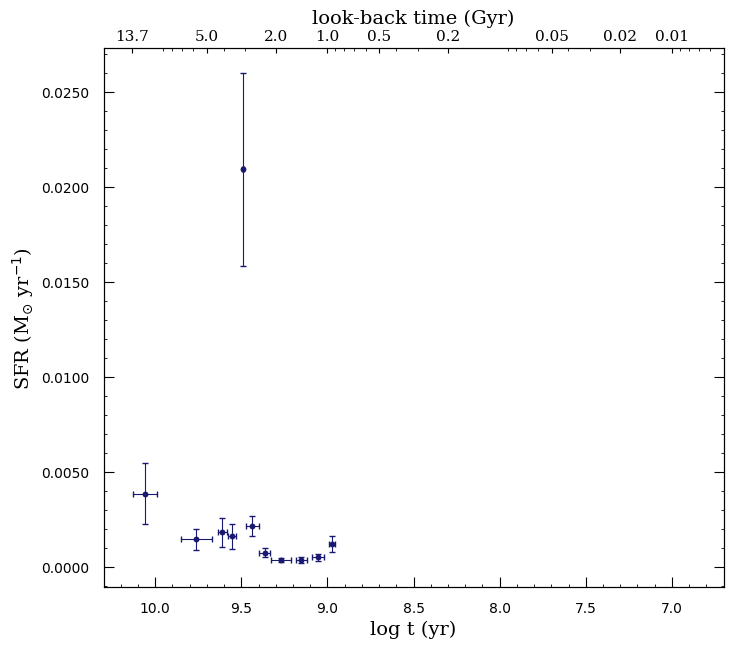

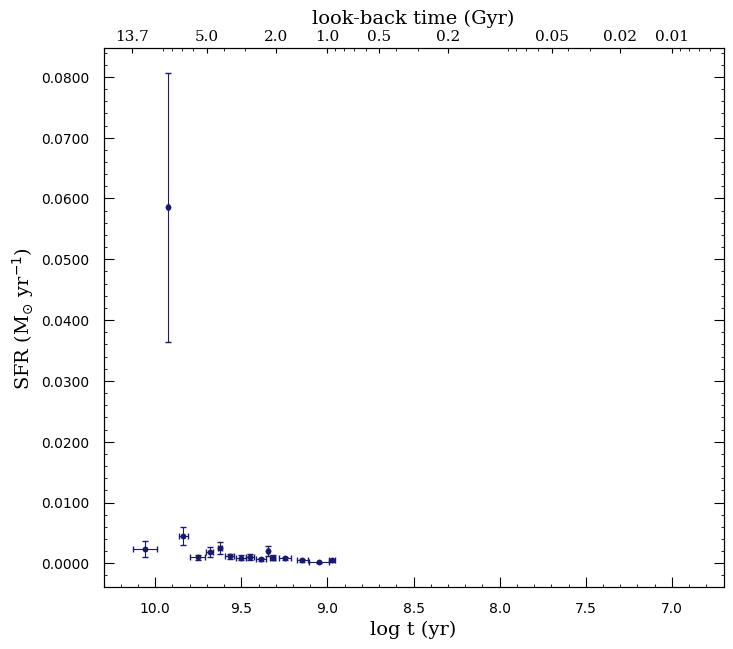

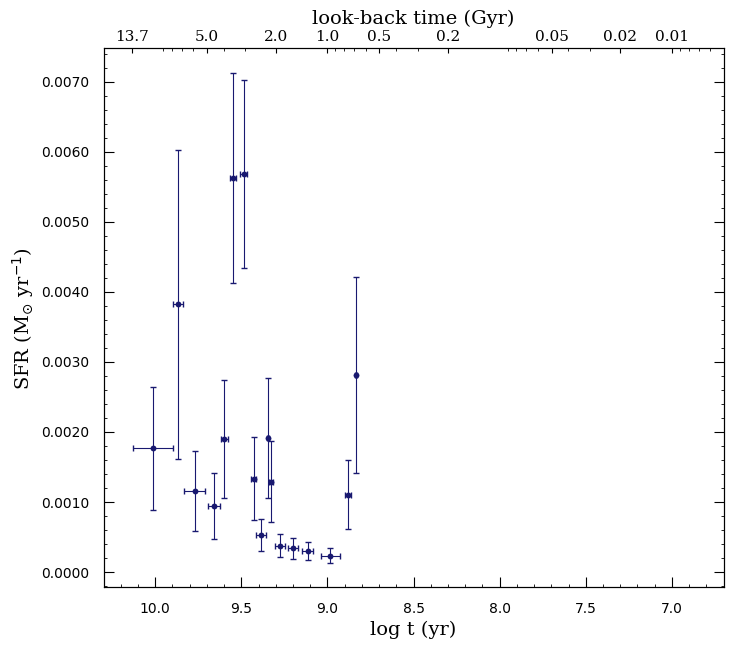

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]
  df_rem = SFR_df_list_rem_prime[l]
  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in range(len(bins_pop)):
    selected_df = df[df['bin_num'] == i ]
    selected_df_rem = df_rem[df_rem['bin_num'] == i ]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt']) + sum(1/selected_df_rem['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    star_num = len(selected_df) + len(selected_df_rem)
    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((star_num**0.5)/star_num)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)



  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

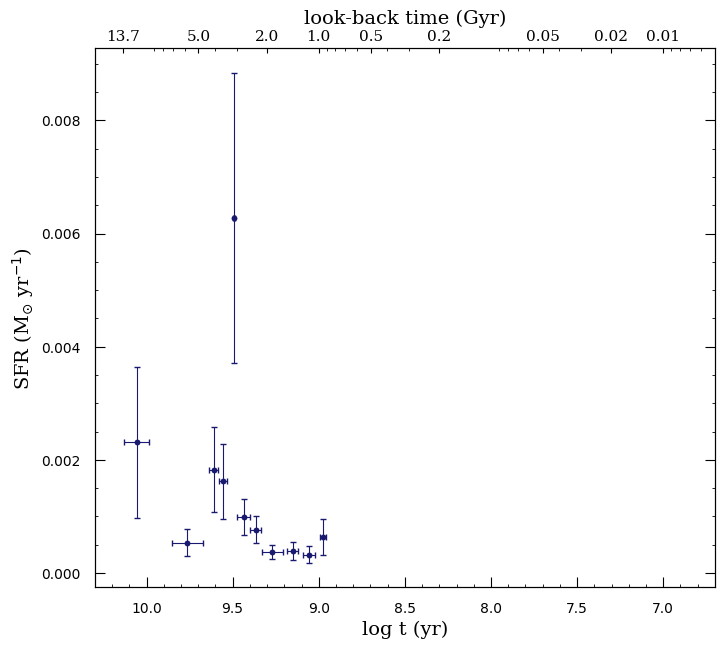

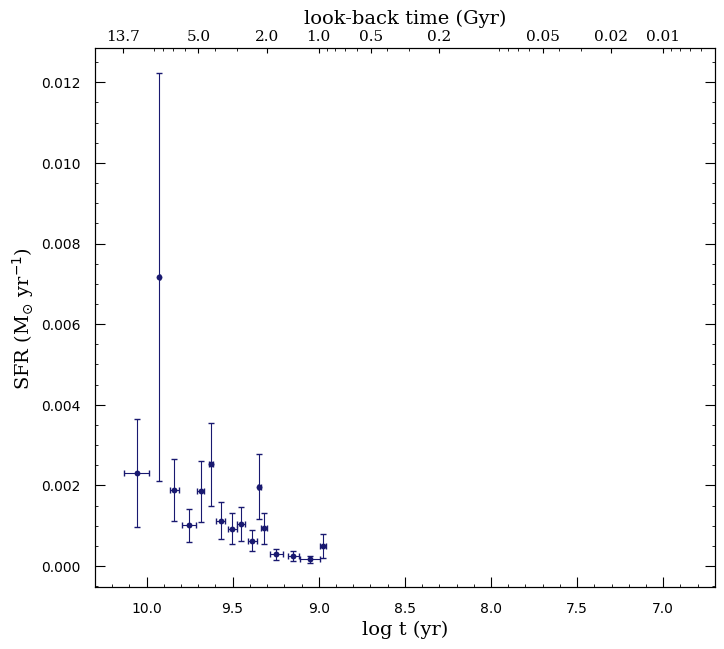

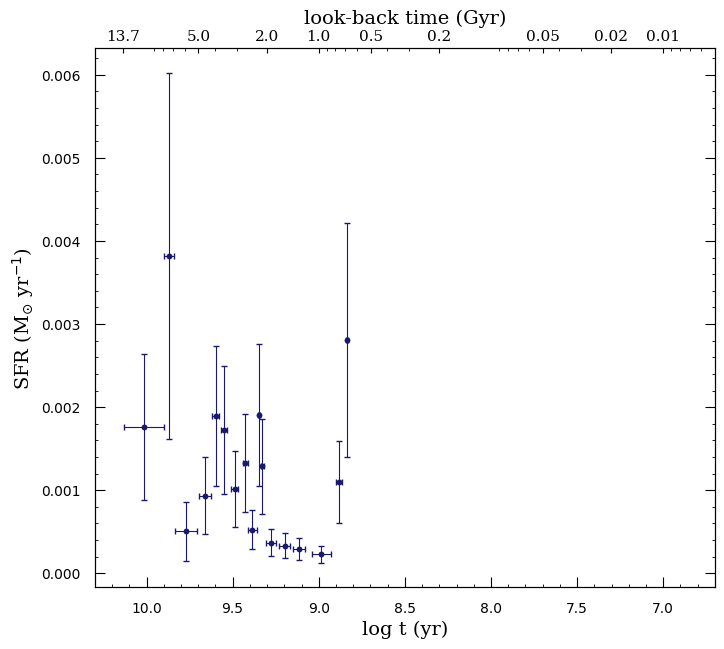

In [ ]:
for l in range(len(SFR_df_list)):
  #Sorting By t (Age of LPV Stras)
  df = SFR_df_list[l]

  #Finding Alpha
  df['alpha'] = np.nan
  for k in df.index:
    if df.loc[k,'M/Ms'] < 0.08 :
      df.loc[k,'alpha'] = 0.3
    elif df.loc[k,'M/Ms'] >= 0.5 :
      df.loc[k,'alpha'] = 2.3
    else :
      df.loc[k,'alpha'] = 1.3

  # Whole Region
  # Setting populatopn of each bins
  bins_pop =  bins_list[l]

  #SFH Calcualtion
  lower_index = 0
  sub_integration = 0

  sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                    + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                      + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

  log_t = []
  log_t_err = []

  XI = []
  XI_err = []

  alpha =[]
  M_lower_limit = []
  M_upper_limit = []
  log_t_lower_limit = []
  log_t_upper_limit = []

  for i in bins_pop :
    selected_df = df[lower_index:lower_index+i]

    # Calculating limitation of each bin
    M_lower_limit_ = selected_df.iloc[0]['M/Ms']
    M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
    alpha_ = selected_df.iloc[0]['alpha']
    log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
    log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

    # Adding to lists
    alpha.append(alpha_)
    M_lower_limit.append(M_lower_limit_)
    M_upper_limit.append(M_upper_limit_)
    log_t_lower_limit.append(log_t_lower_limit_)
    log_t_upper_limit.append(log_t_upper_limit_)

    # Calculating XI
    p1 = sum(1/selected_df['dt'])
    p2 = sub_integration
    p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)

    XI_ = p1 * p2 * (1/p3)
    XI_err_ = XI_ * ((i**0.5)/i)

    log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
    log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
    XI.append(XI_)
    XI_err.append(XI_err_)

    lower_index += i


  # Making Data frame for SFH calculation
  columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
            'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
            'Mean log(t) error' , 'XI' , 'XI error']

  # Calling DataFrame constructor after zipping
  # both lists, with columns specified
  SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                                M_lower_limit,M_upper_limit,alpha,log_t,
                                log_t_err,XI,XI_err)), columns =columns)

  #Plot
  plt.figure(figsize = (8,7), dpi = 100)

  plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)',{'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

  plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
  plt.tick_params(axis='y', which='both', left=True, direction='in')
  plt.tick_params(axis='x', which='both', bottom=True, direction='in')
  plt.tick_params(axis='x', which='both', top=True, direction='in')
  plt.tick_params(axis='y', which='both', right=True, direction='in')

  plt.minorticks_on()

  xlim_lower_left, xlim_lower_right = 10.3,6.7
  plt.xlim(xlim_lower_left,xlim_lower_right)

  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue')
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

  #plt.legend()

  ###########################################
  ax2 = plt.twiny()

  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax2.set_xlim((10**xlim_lower_left)/10**9,(10**xlim_lower_right)/10**9)

  ax2.set_xscale('log')

  ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
  ax2.xaxis.set_label_position('top')
  ax2.yaxis.set_label_position('right')
  ax2.set_xticks((13.7,5,2,1,0.5,0.2,0.05,0.02,0.01))
  ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
  ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

  ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
  ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
  #ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
  ###########################################

  #Saving Data
  SFH_df.to_csv('/content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_' +str(l+1)+ '.csv', index=False)
  plt.savefig('/content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_' + str(l+1)+'.jpeg', bbox_inches='tight', dpi = 400)

# Downloading Data

In [ ]:
!zip -r /content/Bar_Whitelock.zip /content/Bar_Whitelock

updating: content/Bar_Whitelock/ (stored 0%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_1.jpeg (deflated 60%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_1.csv (deflated 51%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_3.jpeg (deflated 62%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_2.csv (deflated 50%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_3.csv (deflated 50%)
updating: content/Bar_Whitelock/SFH_Data_Bar_Whitelock_AMR_CEL_2.jpeg (deflated 59%)


In [ ]:
!zip -r /content/Bar.zip /content/Bar

updating: content/Bar/ (stored 0%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_3.csv (deflated 52%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_1.jpeg (deflated 56%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_1.csv (deflated 51%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_2.csv (deflated 52%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_3.jpeg (deflated 56%)
updating: content/Bar/SFH_Data_Bar_AMR_CEL_2.jpeg (deflated 56%)


In [ ]:
!zip -r /content/Outer_Region.zip /content/Outer_Region/

updating: content/Outer_Region/ (stored 0%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_1.csv (deflated 52%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_3.csv (deflated 52%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_3.jpeg (deflated 60%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_1.jpeg (deflated 63%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_2.jpeg (deflated 60%)
updating: content/Outer_Region/SFH_Data_Outer_Region_AMR_CEL_2.csv (deflated 52%)
